<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 23. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Die Zukunft richtig ausgependelt</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

In dieser Aufgabe studieren wir ein **Pendel im Schwerefeld** der Erde. In Polarkoordinaten ist die Bewegungsgleichung gegeben als

\begin{equation}
  \overset{..}{\phi}(t) = -\sin{\left(\phi(t)\right)}\nonumber,
\end{equation}

wobei $\phi$ den Auslenkungswinkel des Pendels parametrisiert und wir die Masse $m$ sowie die Gravitationskonstante $g$ auf $1$ gesetzt haben.

Die einfachste Methode, um eine Differentialgleichung zu lösen, sind die **Euler-Verfahren**. Implementieren Sie sowohl das *forward-* als auch das *backward-*Euler Verfahren und vergleichen Sie die Stabilität der Lösungen. Betrachten Sie dazu neben der Bahnkurve $\phi(t)$ auch die potentielle, kinetische und die Gesamtenergie und erklären Sie die Unterschiede zwischen den beiden Verfahren. Setzen Sie dazu den Zeitschritt $\Delta t = 0.1$, damit der Unterschied klar zur Geltung kommt.

**Hinweise**

Die zu bearbeitende Differentialgleichung ist zweiter Ordnung, deswegen müssen wir sie umformen in ein System von Differentialgleichungen erster Ordnung. Allgemein geschieht dies so, dass wir die Ableitung $n$-ter Ordnung, bezeichnet durch $y^{(n)}$, als Funktion der anderen Ordnungen auffassen:

\begin{equation}
y^{(n)} = f(x, y^{(1)}, \dots, y^{(n - 1)})
\end{equation}

Im nächsten Schritt führen wir dann Funktionen $z_i$ ein, die gleich den $(i-1)$-ten Ableitungen gesetzt werden, also

\begin{align*}
  z_1 &= y\\
  z_2 &= y^{(1)} \\
  &\dots\\
  z_n &= y^{(n-1)}.
\end{align*}

Die Ableitung von $z_i$ ist so gleich $z_{i + 1}$. Aus dem Vektor aller Ableitungen  $\overset{.}{\vec{z}} = (\overset{.}{z_1}, \dots, \overset{.}{z_n})$, erhält man so ein System mit $n$ gekoppelten Differentialgleichungen.

Für unser Pendel schreiben wir also $\overset{..}{\phi} = f(t, \phi, \overset{.}{\phi})= -\sin{\left(\phi\right)}$ und führen neue Funktionen $z_1, z_2$ ein:

\begin{align*}
  z_1 &= \phi\\
  z_2 &= \overset{.}{\phi}
\end{align*}

Das zu bearbeitende System lautet also:

\begin{align*}
  \overset{.}{z_1} &= z_2\\
  \overset{.}{z_2} &= \overset{..}{\phi} = -\sin{\left( z_1\right)}
\end{align*}

### Forward Euler

#### function

In [19]:
# initialize values
function euler_2nd_order_forward(fddot, phi_0, phidot_0, t_0, t_end, dt=0.1)
    # f: \ddot\phi(t) = f(phi(t))
    # get time values
    times = collect(t_0:dt:t_end)

    # initialize output arrays
    phis    = []
    phidots = []

    # set marginal conditions
    push!(phis,  phi_0)
    push!(phidots,  phidot_0)

    for i in 2:length(times)
        push!(phis, phidots[i-1]*dt+phis[i-1])
        push!(phidots, fddot(phis[i-1]))
    end
    return (times, phis, phidots)
end

euler_2nd_order_forward (generic function with 2 methods)

Any[0.3141592653589793,0.3141592653589793,0.28325756592148454,0.2523558664839898,0.22440737866735705,0.19943878877891813,0.17718592485838866,0.1573739973407095,0.13974797152750862,0.12407545164728505,0.11014609688827083,0.09777036233709295,0.08677801098128525,0.07701654382395828,0.06834962987821568,0.060655587026864785,0.05382594458019309,0.04776410449312672,0.042384108763052104,0.03760951426475153,0.033372372263640246,0.02961230740344266,0.02627568959790584,0.02331489161690732,0.02068762499747673,0.01835634705681233,0.01628773211798721,0.01445220049843058,0.012823499301943219,0.011378329561153826,0.010096014776063787,0.008958206371642468,0.007948622045313396,0.00705281338962168,0.006257959555041395,0.005552684063102851,0.0049268921921669425,0.004371626639219301,0.0038789394132784363,0.0034417781417998257,0.0030538851731910103,0.0027097080385229933,0.0024043199958901484,0.002133349523639046,0.0018929177556963636,0.0016795829651533904,0.0014902913026268144,0.0013223330850798268,0.001173

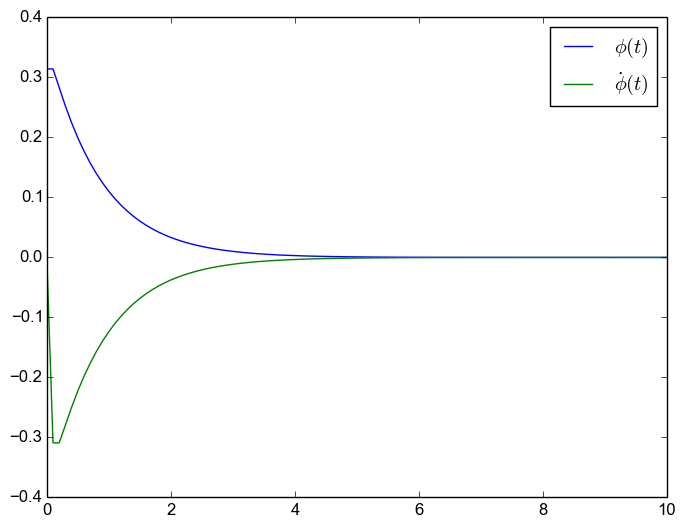

In [21]:
using PyPlot

#figure()
#title(L"\ddot{\phi}(t) = -\sin(\phi(t))")
xs, phis, pdots = euler_2nd_order_forward(x->-sin(x), pi/10, 0, 0, 10, 0.1)
plot(xs, phis, label=L"\phi(t)")
plot(xs, phidots, label=L"\dot{\phi}(t)")
legend()
println(phis)
println(phidots)

### Backward Euler

In [1]:
function euler_backward(f, dt)
    # Arrays um die Zeitentwicklung von Ort und Geschwindigkeit aufzuzeichnen
    back_phis = zeros(times)
    back_phi_dots = zeros(times)

    # Randbedingung - Auslenkung ohne Geschwindigkeit
    back_phis[1] = pi/10

    ###...
    ### Fuegen Sie hier Ihren Code ein
    ###...
end

euler_backward (generic function with 1 method)